In [ ]:
import csv
import pandas as pd
import os

In [ ]:
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
os.chdir('ATM ') 
os.getcwd()

FileNotFoundError: ignored

In [ ]:
file_path =  '/content/drive/MyDrive/ATM /SEM2012_training_data_with_features.csv'
data = pd.read_csv(file_path)


file_path_test =  '/content/drive/MyDrive/ATM /SEM2012_validation_data_with_features.csv'
data_test = pd.read_csv(file_path_test)

data.head(5)

,annotator,sentence_id,token_id,token,label,token_lower,token_no_punct,token_no_stop,lemma,pos,prev_lemma,next_lemma,prev_pos,next_pos,snowball_stemmer,Porter_stemmer,head,dependency,is_part_of_negation,has_prefix,has_postfix,has_infix,base,base_in_dictionary,has_apostrophe
0,baskervilles01,0,0,chapter,O,chapter,chapter,chapter,chapter,NOUN,NaN,1,NaN,X,chapter,chapter,5,nmod,0,False,False,False,chapter,True,False
1,baskervilles01,0,1,1.,O,1.,1,1,1,X,chapter,mr,NOUN,NOUN,1.,1.,1,nummod,0,False,False,False,1.,False,False
2,baskervilles01,0,2,mr.,O,mr.,mr,mr,mr,NOUN,1,sherlock,X,VERB,mr.,mr.,1,nummod,0,False,False,False,mr.,False,False
3,baskervilles01,0,3,sherlock,O,sherlock,sherlock,sherlock,sherlock,VERB,mr,holme,NOUN,NOUN,sherlock,sherlock,5,compound,0,False,False,False,sherlock,True,False
4,baskervilles01,0,4,holmes,O,holmes,holmes,holmes,holme,NOUN,sherlock,mr,VERB,NOUN,holm,holm,0,ROOT,0,False,False,False,holmes,False,False


In [ ]:
def transform_to_crf(dataframe):

  column_values = dataframe[['annotator']].values.ravel()
  annotator_ids = pd.unique(column_values)
  X_ready = []
  y_ready = []

  for annotator in annotator_ids:  # for each annotator
      # get the data for the annotator
      annotator_data = dataframe[dataframe['annotator'] == annotator]
      # get the sentence ids
      column_values = annotator_data[['sentence_id']].values.ravel()
      sentence_ids = pd.unique(column_values)  # get the unique sentence ids

      for sent_id in sentence_ids:
        new_sentence = []
        sentence = annotator_data.loc[annotator_data['sentence_id']
                                            == sent_id]
        X= sentence.loc[:, sentence.columns != 'label']
        y = sentence['label'].values.ravel()
        for i, token_features in X.iterrows():
          new_sentence.append(token_features.to_dict())
        X_ready.append(new_sentence)
        y_ready.append(list(y))

  return X_ready, y_ready

import sklearn_crfsuite
from sklearn_crfsuite import metrics

X_train, y_train = transform_to_crf(data)


print(len(X_train))
print(len(y_train))

X_test, y_test = transform_to_crf(data_test)

print(len(X_test))
print(len(y_test))

3640
3640


In [ ]:
crf = sklearn_crfsuite.CRF(
 algorithm='lbfgs', 
 c1=0.1, 
 c2=0.1, 
 max_iterations=100, 
 all_possible_transitions=True
)

try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass

predictions = crf.predict(X_test)

In [41]:
from sklearn_crfsuite import metrics
labels = list(crf.classes_)
metrics.flat_f1_score(y_test, predictions,
                      average='macro', labels=labels)


0.8912303626400145

In [39]:
from sklearn.metrics import multilabel_confusion_matrix
cm = confusion_matrix(y_test_flatten, predictions_flatten, labels)
cm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=['O', 'B-NEG', 'I-NEG'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  return f(**kwargs)


array([[7227,   11,    0],
       [  21,  113,    0],
       [   1,    0,    2]])

In [26]:
y_test_flatten = [y for x in y_test for y in x]
predictions_flatten = [y for x in predictions for y in x]

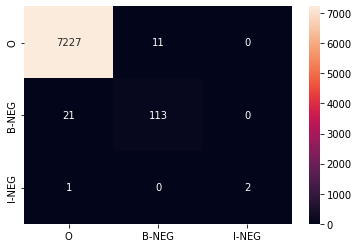

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

f = sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)